# Image reconstruction - SVD vs PCA 

## (Homework3)

**Student Name: Fatemeh Ahmadvand**  

**Student ID: S301384**

In [1]:
#pip install pillow

# Install and import all the libraries

In [2]:
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from PIL import Image
import time

# Data preparation

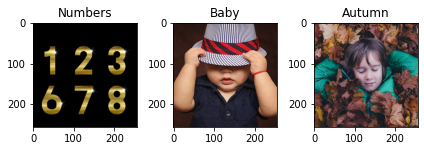

In [3]:
imgs = []
imgs.append(Image.open("img1.png"))
imgs.append(Image.open("img2.png"))
imgs.append(Image.open("img3.png"))

n_images = 3
imgs_names = ["Numbers", "Baby", "Autumn"]
fig, axs = plt.subplots(1,n_images)

for i in range(n_images):
    axs[i].imshow(imgs[i])
    axs[i].set_title(imgs_names[i])
    fig.tight_layout()
plt.show()

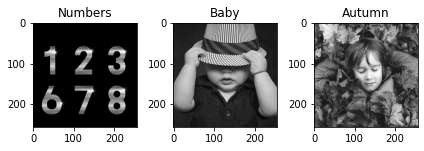

In [4]:
imggray = []
imgmat = []
fig, axs = plt.subplots(1,n_images)
for i in range (n_images):
    imggray.append(imgs[i].convert('LA'))
    imgmat.append(np.array(list(imggray[i].getdata(band=0)), int))
    imgmat[i].shape = (imggray[i].size[1], imggray[i].size[0])
    imgmat[i] = np.matrix(imgmat[i])
    imgmat[i]=imgmat[i]/255
    axs[i].imshow(imgmat[i], cmap="gray")
    axs[i].set_title(imgs_names[i])
    fig.tight_layout()
plt.show()

In [5]:
imgs_df = []
for i in range(n_images):
    imgs_df.append(pd.DataFrame(imgmat[i]))
imgs_df[1]

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.105882,0.109804,0.109804,0.109804,0.113725,0.109804,0.098039,0.098039,0.098039,0.098039,...,0.094118,0.094118,0.090196,0.090196,0.094118,0.094118,0.094118,0.090196,0.090196,0.090196
1,0.113725,0.109804,0.109804,0.113725,0.105882,0.105882,0.101961,0.098039,0.098039,0.098039,...,0.094118,0.094118,0.090196,0.090196,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118
2,0.105882,0.105882,0.105882,0.105882,0.105882,0.101961,0.098039,0.098039,0.098039,0.101961,...,0.094118,0.098039,0.090196,0.090196,0.090196,0.094118,0.094118,0.098039,0.094118,0.094118
3,0.098039,0.105882,0.105882,0.105882,0.101961,0.101961,0.098039,0.098039,0.101961,0.101961,...,0.094118,0.098039,0.090196,0.090196,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118
4,0.098039,0.098039,0.098039,0.101961,0.098039,0.101961,0.101961,0.094118,0.094118,0.098039,...,0.094118,0.098039,0.094118,0.090196,0.090196,0.090196,0.090196,0.094118,0.094118,0.094118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.133333,0.129412,0.133333,0.133333,0.133333,0.129412,0.125490,0.125490,0.125490,0.125490,...,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.094118,0.094118
252,0.125490,0.133333,0.137255,0.137255,0.137255,0.133333,0.133333,0.129412,0.129412,0.125490,...,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.094118,0.098039,0.090196,0.090196
253,0.121569,0.129412,0.129412,0.133333,0.137255,0.137255,0.129412,0.129412,0.129412,0.129412,...,0.094118,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.098039,0.090196,0.094118
254,0.117647,0.125490,0.125490,0.129412,0.133333,0.133333,0.133333,0.129412,0.129412,0.125490,...,0.098039,0.094118,0.098039,0.094118,0.094118,0.094118,0.094118,0.094118,0.090196,0.094118


# Principal Components Analysis

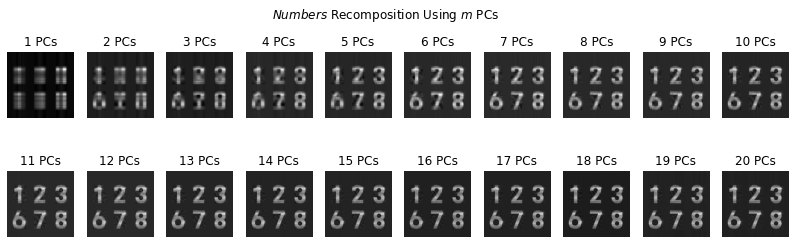

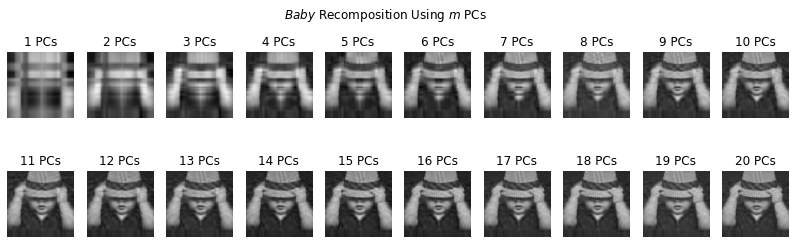

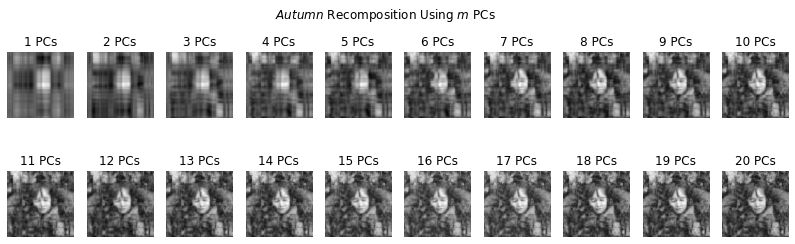

In [6]:
pca_imgs = []
pca_error = []
pca_times = []
for i in range(n_images):
    err_PCA=[]
    times_PCA=[]
    pca_img_array = []
    fig, axs = plt.subplots(2, 10)
    fig.set_size_inches(14,4)
    fig.suptitle(f"${imgs_names[i]}$ Recomposition Using $m$ PCs")
    for j in range(1,21):
        ir = (j-1) // 10
        ic = (j-1) % 10
        start=time.time()
        pca_cat = PCA(n_components=j)
        trans_pca_cat = pca_cat.fit_transform(imgs_df[i])
        cat_arr = pca_cat.inverse_transform(trans_pca_cat)
        end=time.time()
        time_elapsed=end-start
        axs[ir][ic].set_title(f"{j} PCs")
        pca_img_array.append(cat_arr)
        axs[ir][ic].imshow(cat_arr,cmap="gray")
        axs[ir][ic].axis('off')
        err_PCA.append(np.linalg.norm(imgmat[i]-cat_arr,'fro'))
        times_PCA.append(time_elapsed)
    #err.append(np.linalg.norm(imgmat/255-cat_arr,'fro'))
    pca_imgs.append(pca_img_array)
    pca_error.append(err_PCA)
    pca_times.append(times_PCA)
    plt.show()

#  Singular Value Decomposition

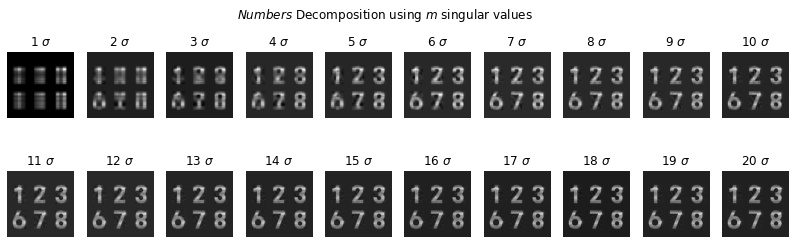

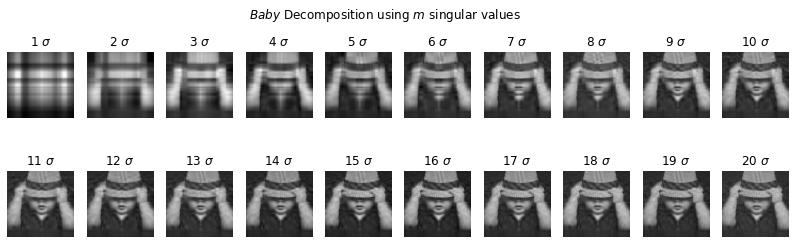

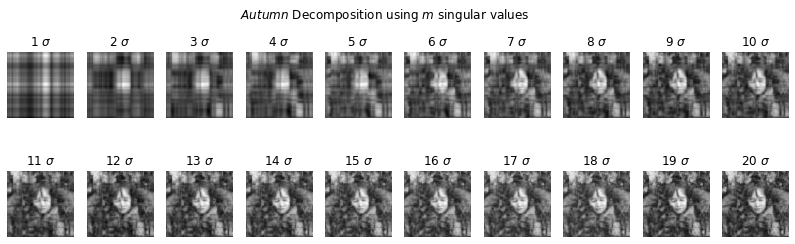

In [7]:
svd_imgs = []
svd_error = []
svd_times = []
for i in range(n_images):
    U, sigma, V = np.linalg.svd(imgmat[i], full_matrices=False)
    err_svd=[]
    times_svd=[]
    svd_img_array = []
    fig, axs = plt.subplots(2, 10)
    fig.set_size_inches(14,4)
    fig.suptitle(f"${imgs_names[i]}$ Decomposition using $m$ singular values")
    for j in range(1,21):
        ir = (j-1) // 10
        ic = (j-1) % 10
        start=time.time()
        reconstimg = np.matrix(U[:, :j]) * np.diag(sigma[:j]) * np.matrix(V[:j, :])
        end=time.time()
        time_elapsed=end-start
        svd_img_array.append(reconstimg)
        err_svd.append(np.linalg.norm(imgmat[i]-reconstimg,'fro'))
        times_svd.append(time_elapsed)
        axs[ir][ic].imshow(reconstimg, cmap='gray')
        axs[ir][ic].set_title(f"{j} $\sigma$")
        axs[ir][ic].axis('off')
    svd_imgs.append(svd_img_array)
    svd_error.append(err_svd)
    svd_times.append(times_svd)
    plt.show()

# ACCURACY

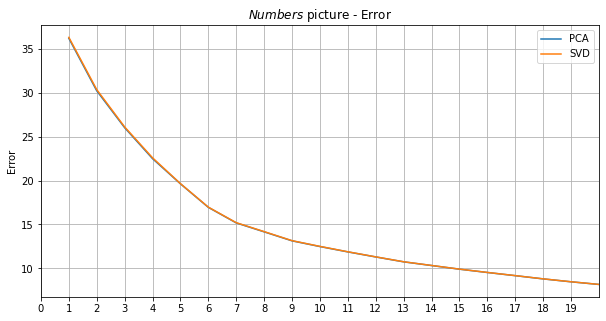

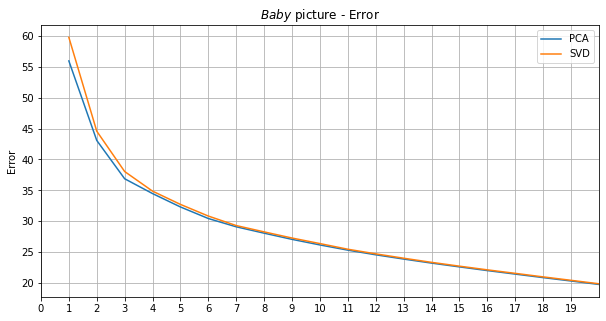

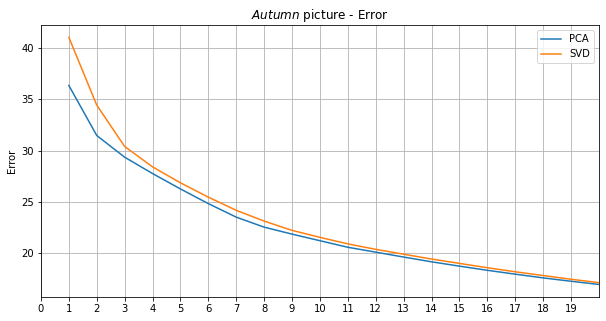

In [8]:
for i in range(n_images):
    plt.figure(figsize=(10,5))
    plt.margins(x=0)
    plt.plot(range(1,21), pca_error[i],label="PCA")
    plt.plot(range(1,21), svd_error[i],label="SVD")
    plt.title(f'${imgs_names[i]}$ picture - Error')
    plt.xticks(ticks=range(20),
            labels=[f'{i}' for i in range(20)])
    #plt.xlabel('Number of principal components')
    plt.legend(loc="upper right")
    plt.ylabel('Error')
    plt.grid()
plt.show()

# Visual comparison

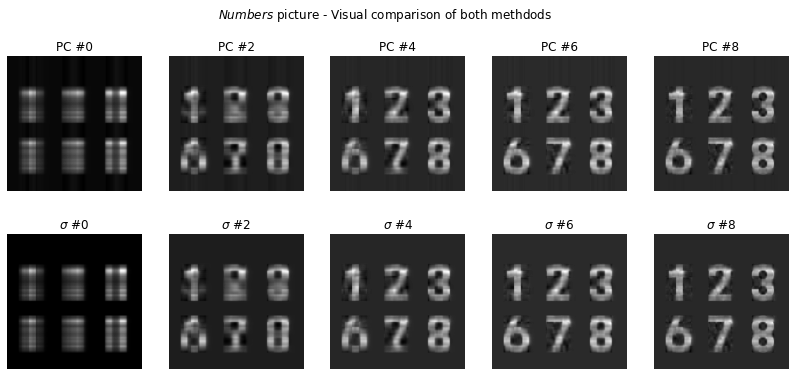

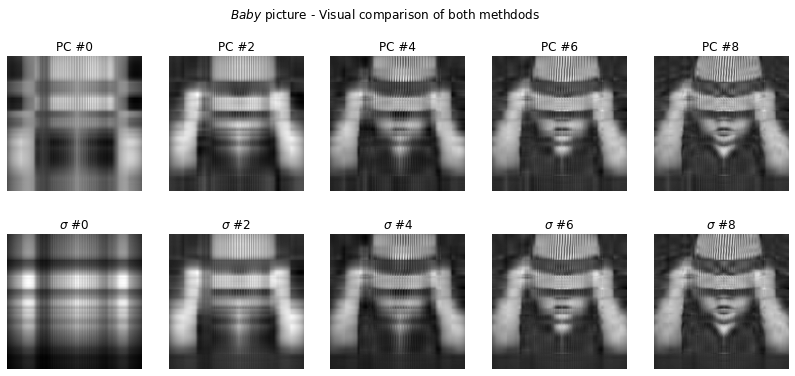

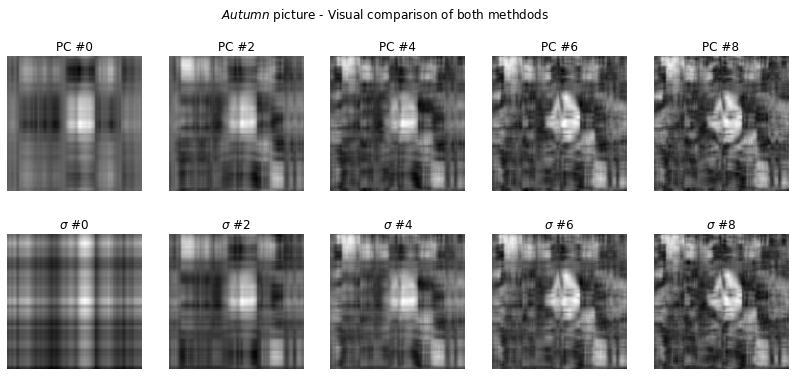

In [9]:
for i in range(n_images):
    pca_img_array = pca_imgs[i]
    svd_img_array = svd_imgs[i]
    fig, axs = plt.subplots(2, 5)
    fig.set_size_inches(14,6)
    fig.suptitle(f"${imgs_names[i]}$ picture - Visual comparison of both methdods")
    for j in range(0,5):
        ir = 3*(j // 5)
        ic = j % 5
        axs[ir][ic].imshow(pca_img_array[2*j], cmap='gray')
        axs[ir][ic].set_title(f"PC #{2*j}")
        axs[ir+1][ic].imshow(svd_img_array[2*j], cmap='gray')
        axs[ir+1][ic].set_title(f"$\sigma$ #{2*j}")
        axs[ir][ic].axis('off')
        axs[ir+1][ic].axis('off')
plt.show()

# Time elapsed

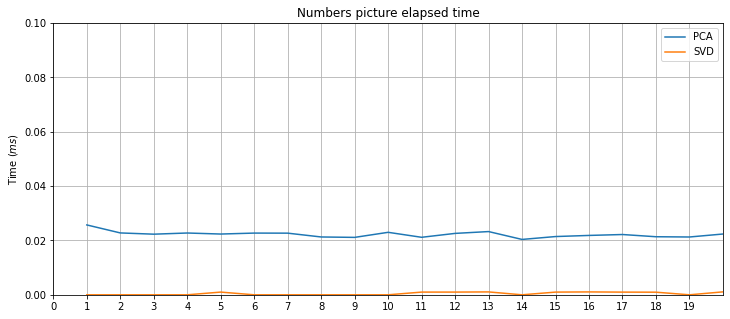

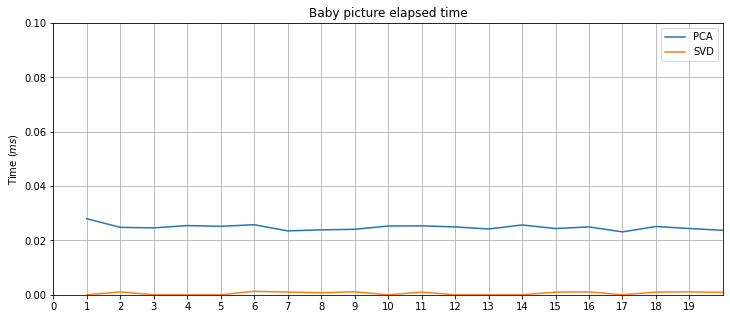

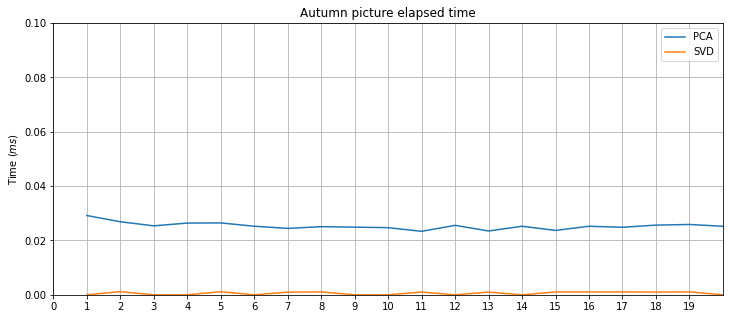

In [10]:
for i in range(n_images):
    plt.figure(figsize=(12,5))
    plt.margins(x=0)
    plt.plot(range(1,21), pca_times[i],label="PCA")
    plt.plot(range(1,21), svd_times[i],label="SVD")
    #plt.plot(range(1,51),times_svd_rec,"r--",label="SVD image reconstruction")
    plt.title(f'{imgs_names[i]} picture elapsed time')
    plt.xticks(ticks=range(20),
            labels=[f'{i}' for i in range(20)])
    #plt.xlabel('Number of principal components')
    plt.legend(loc="upper right")
    plt.ylabel('Time ($ms$)')
    plt.ylim(ymin=0, ymax=0.1)
    plt.grid()
    plt.show()